In [92]:
# Import libraries
import csv
from datetime import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import matplotlib.pyplot as plt
import pylab as pl

In [78]:
# Load and transform data
csv_filename = 'C:/Users/karla/Documents/Harvard/Spring 2018/Thesis/Dengue_trends_AM_111.csv'
dates = []
cases = []
searches  = []

with open(csv_filename, 'r') as csv_fh:
    # Parse as a CSV file.
    reader = csv.reader(csv_fh)
    # Skip the header line.
    next(reader, None)
    # Loop over the file.
    rows = (row for row in reader if (row[0] and row[1] and row[2]))
    for row in rows:
        # Store the data.
        dates.append(str(row[0]))
        cases.append(float(row[1]))
        searches.append(float(row[2]))

dengue_data = (dates, cases, searches)
dates=[dt.strptime(l, '%m/%d/%Y') for l in dengue_data[0]]

## Dynamic Training

In [80]:
# The following function runs an ols regression every time a new data point is entered, yielding a list of dynamic ols parameters
def fitOLS_dynamic(xval, yval):
    blist=[]
    alist=[]
    for i in range(len(xval)):
        if i>=1:
            y=yval[:i+1]
            x=xval[:i+1]
            ols=sm.OLS(y, sm.tools.add_constant(x)).fit()
            b,a=ols.params
            blist.append(b)
            alist.append(a)
    return (blist, alist)

In [83]:
# Predict dengue cases based on updated ols parameters
slope = fitOLS_dynamic(dengue_data[2], dengue_data[1])[0]
error = fitOLS_dynamic(dengue_data[2], dengue_data[1])[1]
predicted_dengue=[]
for i in range(len(dengue_data[0])):
    if i<=1:
        predicted_dengue.append(dengue_data[1][i])
    if i>1:
        pred = dengue_data[2][i]*slope[i-1]+error[i-1] 
        predicted_dengue.append(pred)

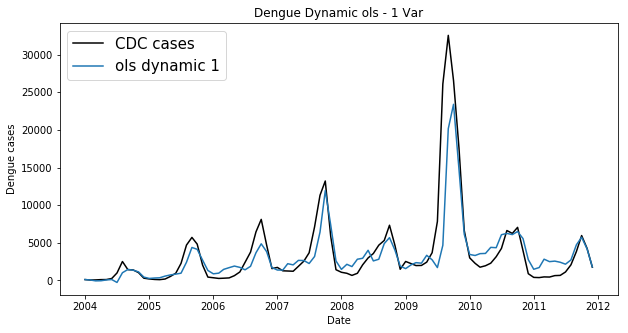

In [94]:
# Plot dynamic model
fig=plt.figure(figsize=(10, 5))
ax=fig.add_subplot(111)
x=dates
y=dengue_data[1]
ax.plot(x, y, 'k', label='CDC cases')
ax.plot(x, predicted_dengue, label='ols dynamic 1')
pl.xlabel('Date')
pl.ylabel('Dengue cases')
pl.title('Dengue Dynamic ols - 1 Var')
pl.legend(loc='upper left', prop={'size':15})
pl.show()